In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings
import json

from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from statsmodels.formula.api import ols

warnings.filterwarnings('ignore')

# 데이터 로드
(출처 :kaggle)

In [71]:
df=pd.read_csv('/Users/SELEN/Downloads/WorldHappiness_Corruption_2015_2020.csv')

In [3]:
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [4]:
df.shape

(792, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [6]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


In [7]:
df.groupby(['continent'])['Country'].nunique()

continent
Africa           32
Asia             37
Australia         2
Europe           38
North America     3
South America    20
Name: Country, dtype: int64

대륙 별로 몇개의 국가에 해당하는 데이터가 존재하는지 확인해보았습니다.

### 전 세계 평균

<AxesSubplot:xlabel='Year', ylabel='happiness_score'>

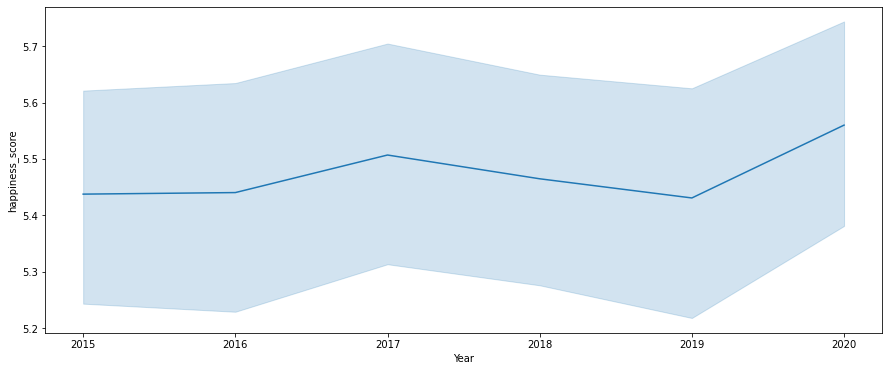

In [11]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Year",y="happiness_score",data=df)

### 대륙별 분석

In [25]:
con=df.groupby(['continent'])['happiness_score'].mean()
con.sort_values(ascending=False)

continent
Australia        7.289033
North America    7.000539
Europe           6.193717
South America    5.865516
Asia             5.267553
Africa           4.353944
Name: happiness_score, dtype: float64

In [40]:
con.sort_values(ascending=False).index

Index(['Australia', 'North America', 'Europe', 'South America', 'Asia',
       'Africa'],
      dtype='object', name='continent')

대륙 별 행복지수의 평균을 계산해보았습니다.

<AxesSubplot:xlabel='continent', ylabel='happiness_score'>

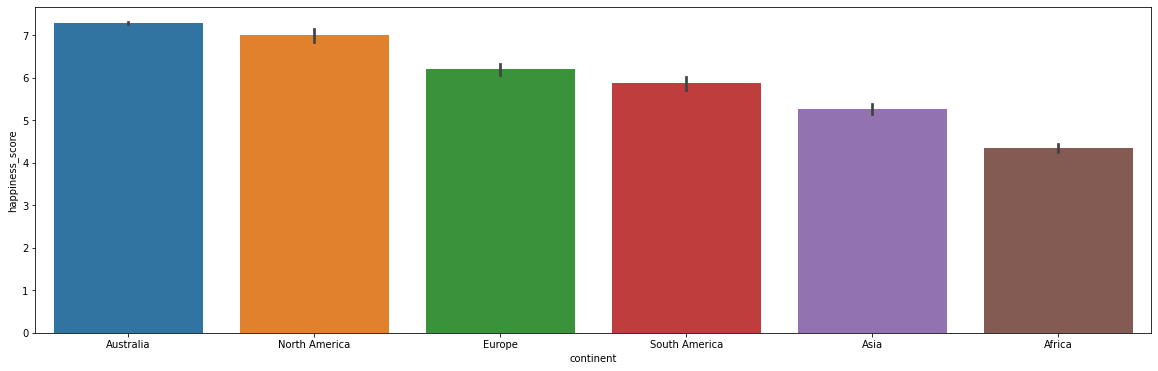

In [41]:
plt.figure(figsize=(20,6))
sns.barplot(x=df['continent'], y=df['happiness_score'],order=con.sort_values(ascending=False).index)

이를 막대그래프로 그려본 결과 오스트레일리아, 북미, 유럽 국가가 높은 것을 한눈에 확인할 수 있습니다.

### 국가별 분석

In [ ]:
#가장 최근 데이터인 2020년 데이터를 사용하여 분석
df2020=df.query('Year==2020')

In [12]:
top5=df2020.sort_values(by=['happiness_score'],ascending=False).head()
worst5=df2020.sort_values(by=['happiness_score']).head()

Text(0.5, 1.0, 'the most unhappiest country in 2020')

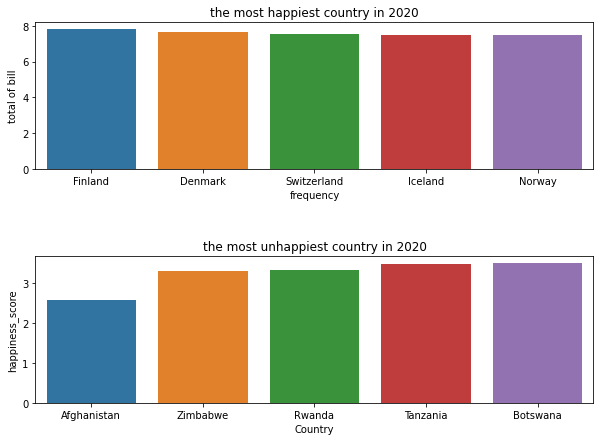

In [13]:
fig=plt.figure(figsize=(10,7))
fig.subplots_adjust(hspace=0.6)

top=fig.add_subplot(2,1,1)
top=sns.barplot(x=top5['Country'], y=top5['happiness_score'])
top.set_title('the most happiest country in 2020')
top.set_xlabel('frequency')
top.set_ylabel('total of bill')

worst=fig.add_subplot(2,1,2)
worst=sns.barplot(x=worst5['Country'], y=worst5['happiness_score'])
worst.set_title('the most unhappiest country in 2020')

행복 지수 상위 5국, 하위5국을 막대그래프로 그려보았습니다. 상위권은 대부분 북유럽 국가가, 하위권은 아프리카 국가들이 차지한 것을 알 수 있습니다. 행복지수가 가장 높은 국가는 핀란드 , 가장 낮은 국가는 아프가니스탄입니다.

In [108]:
map=folium.Map(min_zoom=1)

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [109]:
folium.Choropleth(geo_data = country_shapes, 
             data = df2020,
             columns = ['Country','happiness_score'], 
             key_on = "feature.properties.name",
             highlight = True,
             nan_fill_color='white',
             fill_color = 'RdYlGn', fill_opacity = 0.7, line_opacity = 0.5,
             legend_name = 'Happiness score').add_to(map)

map

국가별 행복 지수를 지도로 표현하였습니다.

# 선형회귀

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


continent가 범주형 자료이므로 제거하였습니다.

In [19]:
df1=df.drop(['continent'],axis=1)

<AxesSubplot:>

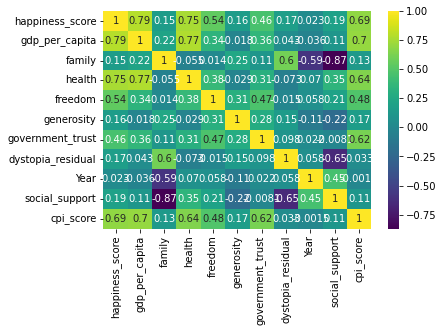

In [44]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

변수간 상관계수를 확인해보았습니다.

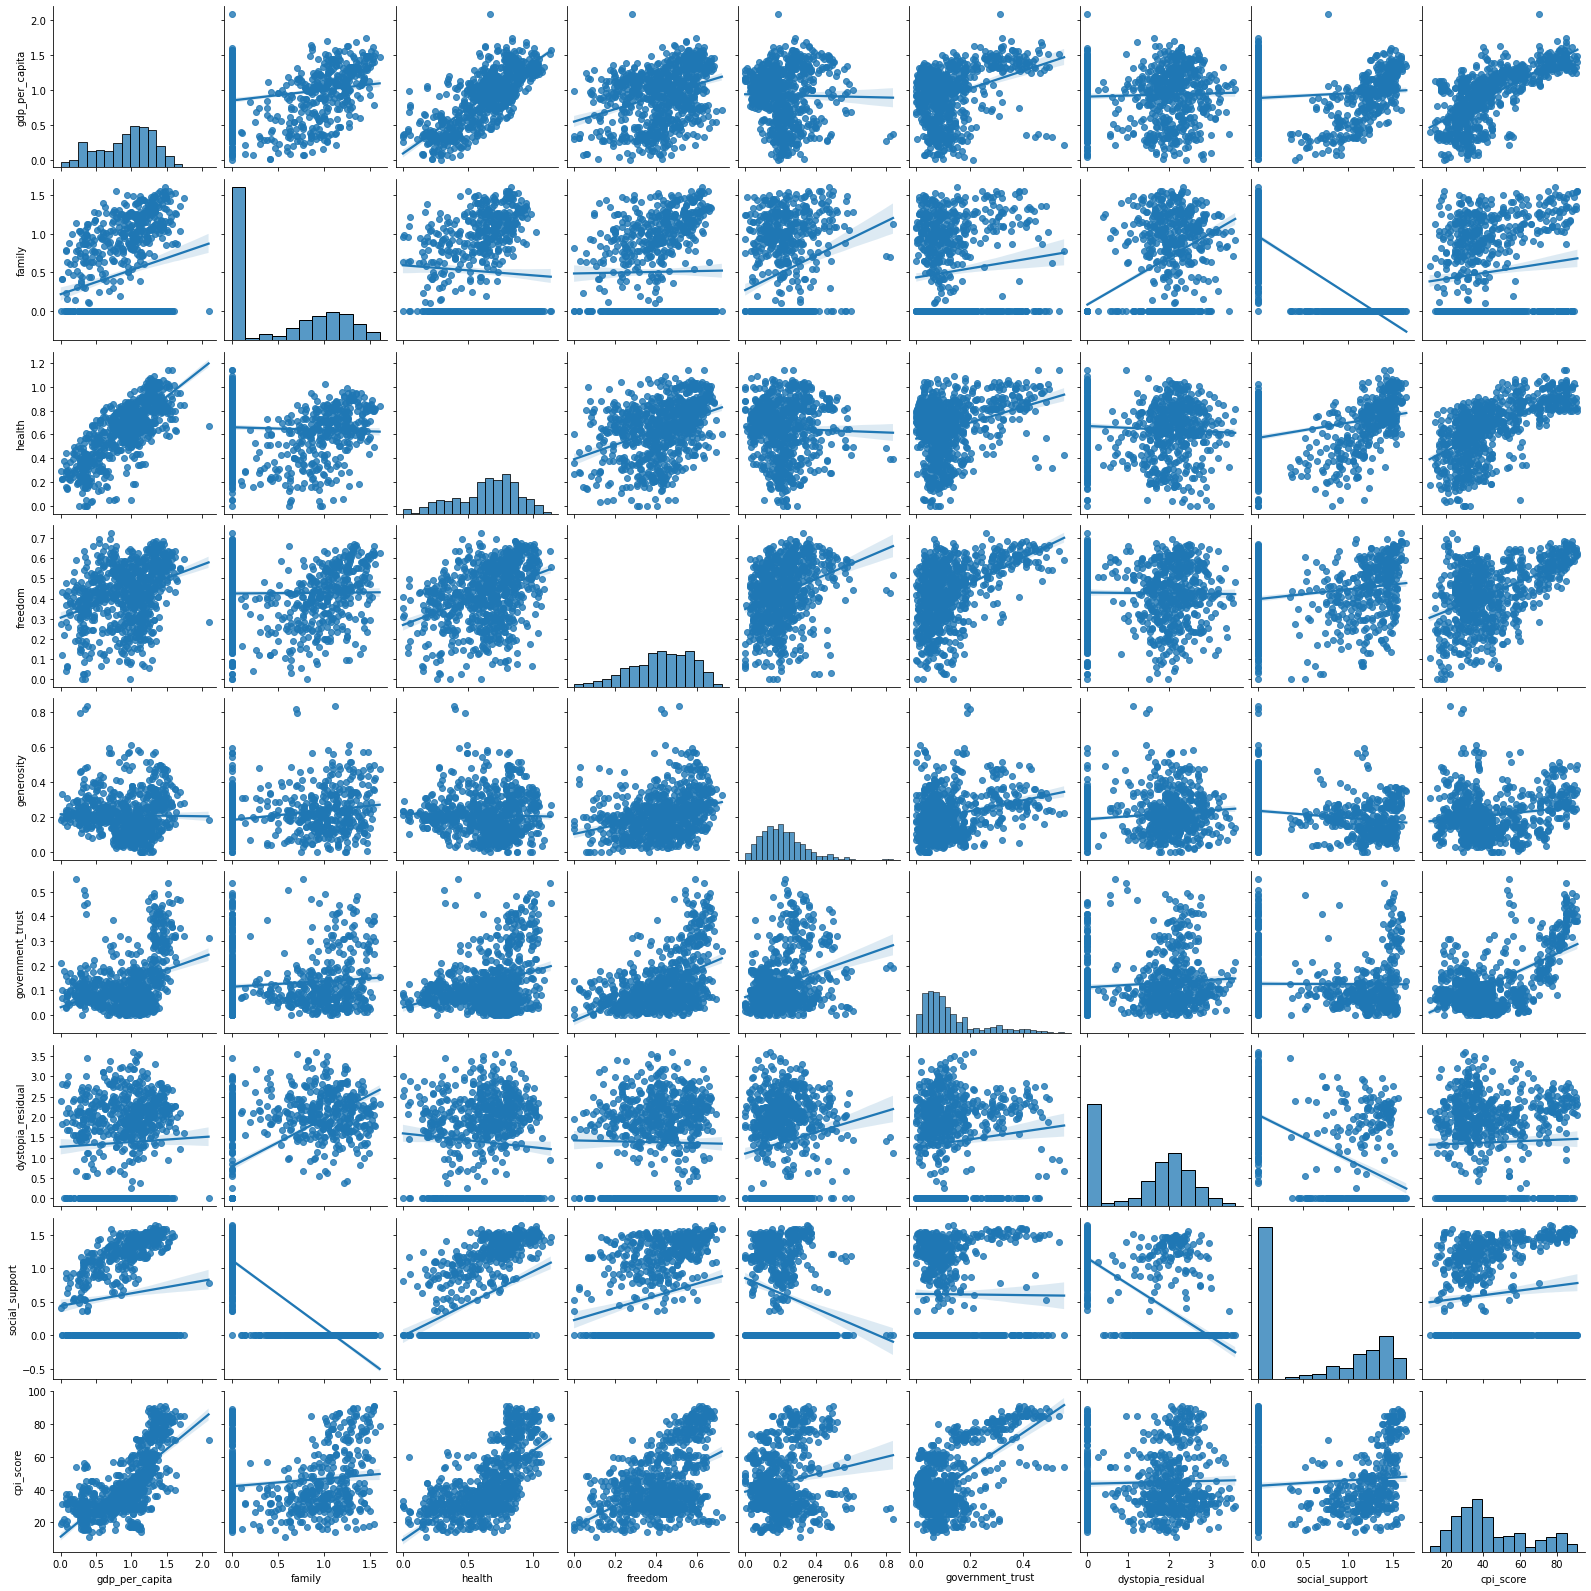

In [261]:
sns.pairplot(df[],kind='reg')

변수 간 산점도와 각 변수의 히스토그램을 확인해 보았습니다. 
다만, 몇 변수의 히스토그램에서 비정상적으로 0에 치우친 변수가 존재하여 이에 대해 자세히 알아보기로 하였습니다.

In [659]:
col=['happiness_score','gdp_per_capita', 'family', 'health','freedom', 'generosity', 'government_trust', 'dystopia_residual',
        'Year', 'social_support', 'cpi_score']

for i in col:
    print(f"{i} {(df[i]==0).sum()}")

happiness_score 0
gdp_per_capita 1
family 397
health 3
freedom 3
generosity 6
government_trust 7
dystopia_residual 264
Year 0
social_support 396
cpi_score 0


각 변수 별로 0의 개수를 확인해 보았습니다.

In [660]:
df[df.government_trust==0]

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
81,Bosnia and Herzegovina,5.1820,0.982409,1.069336,0.705186,0.204403,0.328867,0.0,1.892173,Europe,2015,0.000000,38
196,Indonesia,5.3990,0.828270,1.087080,0.637930,0.466110,0.515350,0.0,1.863990,Asia,2016,0.000000,37
328,Moldova,5.5290,0.685000,0.000000,0.739000,0.245000,0.181000,0.0,0.000000,Europe,2017,1.328000,31
455,Moldova,5.6400,0.657000,0.000000,0.620000,0.232000,0.171000,0.0,0.000000,Europe,2018,1.301000,33
479,Bosnia and Herzegovina,5.1290,0.915000,0.000000,0.758000,0.280000,0.216000,0.0,0.000000,Europe,2018,1.078000,38
602,Bosnia and Herzegovina,5.1630,0.933830,0.643670,0.707660,0.095110,0.298890,0.0,2.484060,Europe,2019,0.000000,36
745,Bulgaria,5.1015,1.046555,0.000000,0.777777,0.417820,0.103834,0.0,1.294961,Europe,2020,1.460579,44


실제로 0인 값이 존재할수도 있겠지만, 예를 들어 gdp가 0.00이거나, 몰도바의 정부 신뢰도가 2020년만 0인 것이 의아하여 누락값을 0으로 처리한 것이라고 판단하였습니다.

In [72]:
def filln(x):
    avg=x.mean()
    return x.fillna(avg)

In [73]:
dff=df.replace(0, np.NaN)
dff=dff.groupby('Country').transform(filln)

0인 값을 처리하기 위하여 국가의 해당 변수의 평균으로 대체하였습니다.

ex) 몰도바의 2020년 정부 신뢰도 -> 몰도바의 2015~2019년 정부신뢰도 평균

In [74]:
dff.min()

happiness_score         2.566900
gdp_per_capita          0.015300
family                  0.104190
health                  0.005565
freedom                 0.025000
generosity              0.001990
government_trust        0.000830
dystopia_residual       0.257241
Year                 2015.000000
social_support          0.352428
cpi_score              11.000000
dtype: float64

In [75]:
dff.isnull().sum()

happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           6
government_trust     0
dystopia_residual    0
Year                 0
social_support       0
cpi_score            0
dtype: int64

전반적으로 처리된 것을 확인할 수 있었으나, 처리되지 못 한 generosity 6개를 확인해보겠습니다.

In [76]:
df[dff.columns]=dff

In [77]:
df[df.generosity.isnull()]

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
78,Greece,5.227,1.289487,1.239415,0.810199,0.095731,NaN,0.043290,1.749222,Europe,2015,1.175658,46
217,Greece,4.857,1.154060,0.929330,0.882130,0.076990,NaN,0.013970,1.801010,Europe,2016,1.175658,44
338,Greece,5.287,1.181000,0.974492,0.999000,0.067000,NaN,0.034000,1.923963,Europe,2017,1.156000,48
467,Greece,5.358,1.154000,0.974492,0.879000,0.131000,NaN,0.044000,1.923963,Europe,2018,1.202000,45
612,Greece,5.033,1.248860,0.754730,0.800290,0.058220,NaN,0.041270,2.129440,Europe,2019,1.175658,48
731,Greece,5.515,1.128070,0.974492,0.979432,0.173516,NaN,0.048844,2.016179,Europe,2020,1.168974,50


그리스의 값이 모두 누락이 되어 평균으로 대체할 값이 없기때문에, generosity의 평균으로 대체하였습니다.

In [78]:
df=df.fillna(dff.generosity.mean())

In [80]:
df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

결측값이 잘 처리된 것을 확인할 수 있습니다.

### 회귀분석

In [84]:
#train 데이터와 test 데이터 분리
x = df[['gdp_per_capita', 'family', 'health','freedom', 'generosity',
          'government_trust','dystopia_residual', 'Year', 'social_support', 'cpi_score']]
y = df['happiness_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

In [104]:
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

In [105]:
mean_absolute_error(y_test, pred)

0.11813092657742977

mae를 계산해본 결과 0.118이 나왔다.

In [90]:
model.intercept_

-79.15681796507582

In [89]:
model.coef_

array([0.92248421, 1.17744342, 0.93749586, 0.73342221, 0.81173987,
       0.82014023, 0.99794032, 0.03918206, 0.12552956, 0.00252033])

모델의 회귀식을 이렇게 정의할 수 있다

-79.157+0.922*gdp_per_capita+1.177*family+0.938*health+0.733*freedom+0.812*generosity+0.820*government_trust+0.998*dystopia_residual+0.0392*Year+0.126*social_support+0.003*cpi_score

In [102]:
#파이썬의 ols를 이용하여 모델을 적합해보았다.
fit = ols('happiness_score~gdp_per_capita+family+health+freedom+generosity+government_trust+dystopia_residual+Year+social_support+cpi_score', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3601.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:56:53   Log-Likelihood:                 309.19
No. Observations:                 792   AIC:                            -596.4
Df Residuals:                     781   BIC:                            -545.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -46.7287      8.02

0.979의 설명력을 가지고 있습니다. 그러나, social_support의 p-value가 0.36으로 유의수중 0.05에서 유의하지 않으므로 social_support를 제거하였습니다.

In [679]:
# 선형 모형 적합
fit = ols('happiness_score~gdp_per_capita+family+health+freedom+generosity+government_trust+dystopia_residual+Year+cpi_score', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4002.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:04:38   Log-Likelihood:                 308.76
No. Observations:                 792   AIC:                            -597.5
Df Residuals:                     782   BIC:                            -550.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -48.9606      7.64

모든 변수가 유의한 것을 확인할 수 있습니다.